# Library upload

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import pickle as pkl
import plotly.express as px
from dash import Dash, dcc, html, Input, Output

import src.data.Preprocessing as pproc

directory = os.getcwd()
data_path = os.path.join(directory, 'Data')

"# Definining the path for the files\nRB_path = os.path.join(data_path, 'RateBeer')\nBA_path = os.path.join(data_path, 'BeerAdvocate')\nMB_path = os.path.join(data_path, 'matched_beer_data')"

# Data upload

In [2]:
dpath = './Data/unified_breweries.pkl'
with open(dpath, 'rb') as f:
    df_breweries = pkl.load(f)

data_path = './Data/unified_users.pkl'
with open(data_path, 'rb') as f:
    df_users = pkl.load(f)

data_path = './Data/unified_ratings.pkl'
with open(data_path, 'rb') as f:
    df_ratings = pkl.load(f)

In [3]:
df_breweries.rename(columns={'id': 'brewery_id'}, inplace=True) # MUST GO INTO THE PREPROCESSING
df_breweries.rename(columns={'location': 'country_brewery'}, inplace=True) # MUST GO INTO THE PREPROCESSING

In [4]:
df_users[~df_users['location'].isna()] ## Either drop the NaN or drop the location column which will not be used anyways

## Drop all the nan values

,nbr_ratings_rb,user_id,user_name,location,nbr_ratings_ba,total_nbr_ratings
0,1890.0,175852.0,Manslow,Poland,0.0,1890.0
1,89.0,442761.0,MAGICuenca91,Spain,0.0,89.0
2,169.0,288889.0,Sibarh,Poland,0.0,169.0
3,3371.0,250510.0,fombe89,Spain,0.0,3371.0
4,13043.0,122778.0,kevnic2008,Germany,0.0,13043.0
...,...,...,...,...,...,...
220852,0.0,188320.0,ETurchick,"United States, California",1.0,1.0
220853,0.0,188321.0,Everman,"United States, California",1.0,1.0
220854,0.0,188322.0,Justin0001,"United States, California",1.0,1.0
220856,0.0,188324.0,JoeTex,"United States, California",1.0,1.0


# Data Exploration

In [5]:
## NEED TO JUSTIFY HOW WE BUILT THE MACRO-GROUPS

beer_dict = {
    'American Pale Ale': 'Pale Ale',
    'American Blonde Ale': 'Pale Ale',
    'Golden Ale/Blond Ale': 'Pale Ale',
    'Bitter': 'Pale Ale',
    'Pale Ale': 'Pale Ale',
    'American Pale Ale (APA)': 'Pale Ale',
    'English Pale Ale': 'Pale Ale',
    'English Bitter': 'Pale Ale',
    'Premium Bitter/ESB': 'Pale Ale',
    'English India Pale Ale (IPA)': 'Pale Ale',
    'Extra Special / Strong Bitter (ESB)': 'Pale Ale',
    'Saison / Farmhouse Ale': 'Pale Ale',
    'English Pale Mild Ale': 'Pale Ale',
    'Saison': 'Pale Ale',
    'Belgian Pale Ale': 'Pale Ale',
    'Belgian Strong Pale Ale': 'Strong Pale Ale',
    'Tripel': 'Strong Pale Ale',
    'Abbey Tripel': 'Strong Pale Ale',
    'American IPA': 'IPA',
    'Black IPA': 'IPA',
    'India Pale Ale (IPA)': 'IPA',
    'American Double / Imperial IPA': 'IPA',
    'Imperial IPA': 'IPA',
    'New England IPA (NEIPA)': 'IPA',
    'Session IPA': 'IPA',
    'Belgian IPA': 'IPA',
    'Abbey Dubbel': 'Brown/Dark Ale',
    'Dubbel': 'Brown/Dark Ale',
    'Belgian Dark Ale': 'Brown/Dark Ale',
    'American Brown Ale': 'Brown/Dark Ale',
    'Brown Ale': 'Brown/Dark Ale',
    'English Dark Mild Ale': 'Brown/Dark Ale',
    'American Black Ale': 'Brown/Dark Ale',
    'English Brown Ale': 'Brown/Dark Ale',
    'Belgian Strong Dark Ale': 'Strong Brown/Dark Ale',
    'Abt/Quadrupel': 'Strong Brown/Dark Ale',
    'Barley Wine': 'Strong Brown/Dark Ale',
    'English Barleywine': 'Strong Brown/Dark Ale',
    'American Barleywine': 'Strong Brown/Dark Ale',
    'Quadrupel (Quad)': 'Strong Brown/Dark Ale',
    'Amber Ale': 'Amber Ale',
    'American Amber Ale': 'Amber Ale',
    'Irish Red Ale': 'Amber Ale',
    'American Amber / Red Ale': 'Amber Ale',
    'Red Ale': 'Amber Ale',
    'Belgian Ale': 'Ale',
    'Irish Ale': 'Ale',
    'Old Ale': 'Ale',
    'Mild Ale': 'Ale',
    'Traditional Ale': 'Ale',
    'Scotch Ale / Wee Heavy': 'Ale',
    'Scotch Ale': 'Ale',
    'Scottish Ale': 'Ale',
    'Belgian Strong Ale': 'Strong Ale',
    'American Strong Ale': 'Strong Ale',
    'English Strong Ale': 'Strong Ale',
    'Winter Warmer': 'Strong Ale',
    'Stout': 'Stout',
    'American Stout': 'Stout',
    'Dry Stout': 'Stout',
    'American Double / Imperial Stout': 'Stout',
    'English Stout': 'Stout',
    'Imperial Stout': 'Stout',
    'Irish Dry Stout': 'Stout',
    'Foreign / Export Stout': 'Stout',
    'Oatmeal Stout': 'Stout',
    'Russian Imperial Stout': 'Stout',
    'Milk / Sweet Stout': 'Stout',
    'Foreign Stout': 'Stout',
    'Sweet Stout': 'Stout',
    'Porter': 'Porter',
    'American Porter': 'Porter',
    'Baltic Porter': 'Porter',
    'Imperial Porter': 'Porter',
    'English Porter': 'Porter',
    'American Dark Wheat Ale': 'Wheat Beer',
    'Berliner Weissbier': 'Wheat Beer',
    'Dunkelweizen': 'Wheat Beer',
    'German Hefeweizen': 'Wheat Beer',
    'Hefeweizen': 'Wheat Beer',
    'Wheat Ale': 'Wheat Beer',
    'Weizen Bock': 'Wheat Beer',
    'Roggenbier': 'Wheat Beer',
    'Weizenbock': 'Wheat Beer',
    'Witbier': 'Wheat Beer',
    'German Kristallweizen': 'Wheat Beer',
    'Berliner Weisse': 'Wheat Beer',
    'Kristalweizen': 'Wheat Beer',
    'Wheatwine': 'Wheat Beer',
    'Dunkelweizen': 'Wheat Beer',
    'American Pale Wheat Ale': 'Wheat Beer',
    'Flanders Oud Bruin': 'Wild/Sour Beer',
    'Flanders Red Ale': 'Wild/Sour Beer',
    'Gose': 'Wild/Sour Beer',
    'Lambic - Fruit': 'Wild/Sour Beer',
    'American Wild Ale': 'Wild/Sour Beer',
    'Lambic - Unblended': 'Wild/Sour Beer',
    'Lambic Style - Faro': 'Wild/Sour Beer',
    'Lambic Style - Fruit': 'Wild/Sour Beer',
    'Lambic Style - Gueuze': 'Wild/Sour Beer',
    'Lambic Style - Unblended': 'Wild/Sour Beer',
    'Sour Red/Brown': 'Wild/Sour Beer',
    'Sour/Wild Ale': 'Wild/Sour Beer',
    'Faro': 'Wild/Sour Beer',
    'Gueuze': 'Wild/Sour Beer',
    'Grodziskie/Gose/Lichtenhainer': 'Wild/Sour Beer',
    'American Adjunct Lager': 'Pilsner & Pale Lager',
    'American Pale Lager': 'Pilsner & Pale Lager',
    'Pilsener': 'Pilsner & Pale Lager',
    'Dortmunder / Export Lager': 'Pilsner & Pale Lager',
    'European Pale Lager': 'Pilsner & Pale Lager',
    'German Pilsener': 'Pilsner & Pale Lager',
    'Pale Lager': 'Pilsner & Pale Lager',
    'Munich Helles Lager': 'Pilsner & Pale Lager',
    'Pilsener (German and Czech)': 'Pilsner & Pale Lager',
    'Czech Pilsener': 'Pilsner & Pale Lager',
    'Czech Pilsner (Světlý)': 'Pilsner & Pale Lager',
    'India Style Lager': 'Pilsner & Pale Lager',
    'Imperial Pils/Strong Pale Lager': 'Pilsner & Pale Lager',
    'Kellerbier / Zwickelbier': 'Pilsner & Pale Lager',
    'Euro Pale Lager': 'Pilsner & Pale Lager',
    'Zwickel/Keller/Landbier': 'Pilsner & Pale Lager',
    'Euro Strong Lager': 'Pilsner & Pale Lager',
    'American Double / Imperial Pilsner': 'Pilsner & Pale Lager',
    'Light Lager': 'Pilsner & Pale Lager',
    'Radler/Shandy': 'Pilsner & Pale Lager',
    'Japanese Rice Lager': 'Pilsner & Pale Lager',
    'Premium Lager': 'Pilsner & Pale Lager',
    'Dortmunder/Helles': 'Pilsner & Pale Lager',
    'Doppelbock': 'Bock',
    'Eisbock': 'Bock',
    'Heller Bock': 'Bock',
    'Maibock / Helles Bock': 'Bock',
    'Bock': 'Bock',
    'Amber Lager/Vienna': 'Dark Lager',
    'Munich Dunkel Lager': 'Dark Lager',
    'Schwarzbier': 'Dark Lager',
    'Vienna Lager': 'Dark Lager',
    'American Amber / Red Lager': 'Dark Lager',
    'Dunkel/Tmavý': 'Dark Lager',
    'Dunkler Bock': 'Dark Lager',
    'Euro Dark Lager': 'Dark Lager',
    'Schwarzbier': 'Dark Lager',
    'Polotmavý': 'Dark Lager',
    'Märzen / Oktoberfest': 'Dark Lager',
    'Oktoberfest/Märzen': 'Dark Lager',
    'Rauchbier': 'Smoked',
    'Smoked': 'Smoked',
    'Smoked Beer': 'Smoked',
    'Cream Ale': 'Hybrid Beer',
    'Kölsch': 'Hybrid Beer',
    'California Common': 'Hybrid Beer',
    'California Common / Steam Beer': 'Hybrid Beer',
    'Braggot': 'Hybrid Beer',
    'Bière de Garde': 'Hybrid Beer',
    'Black & Tan': 'Hybrid Beer',
    'Altbier': 'Hybrid Beer',
    'Rye Beer': 'Hybrid Beer',
    'Chile Beer': 'Herbs/Vegetables',
    'Cider': 'Herbs/Vegetables',
    'Fruit / Vegetable Beer': 'Herbs/Vegetables',
    'Fruit Beer': 'Herbs/Vegetables',
    'Herbed / Spiced Beer': 'Herbs/Vegetables',
    'Mead': 'Herbs/Vegetables',
    'Spice/Herb/Vegetable': 'Herbs/Vegetables',
    'Specialty Grain': 'Herbs/Vegetables',
    'Sahti': 'Herbs/Vegetables',
    'Sahti/Gotlandsdricke/Koduõlu': 'Herbs/Vegetables',
    'Scottish Gruit / Ancient Herbed Ale': 'Herbs/Vegetables',
    'Pumpkin Ale': 'Herbs/Vegetables',
    'Perry': 'Herbs/Vegetables',
    'Happoshu': 'Low Alcohol',
    'Low Alcohol': 'Low Alcohol',
    'Low Alcohol Beer': 'Low Alcohol',
    'Kvass': 'Low Alcohol',
    'American Malt Liquor': 'Cocktails',
    'Bière de Champagne / Bière Brut': 'Cocktails',
    'Malt Liquor': 'Cocktails',
    'Saké - Daiginjo': 'Cocktails',
    'Saké - Futsu-shu': 'Cocktails',
    'Saké - Genshu': 'Cocktails',
    'Saké - Ginjo': 'Cocktails',
    'Saké - Honjozo': 'Cocktails',
    'Saké - Infused': 'Cocktails',
    'Saké - Junmai': 'Cocktails',
    'Saké - Koshu': 'Cocktails',
    'Saké - Namasaké': 'Cocktails',
    'Saké - Nigori': 'Cocktails',
    'Saké - Taru': 'Cocktails',
    'Saké - Tokubetsu': 'Cocktails'
}
df_ratings['style'] = df_ratings['style'].str.strip() # This CAN GO IN THE PREPROCESSING
df_ratings['macro_style'] = df_ratings['style'].map(beer_dict) # This CAN GO IN THE PREPROCESSING
df_ratings['country_brewery'] = df_ratings['country_brewery'].apply(pproc.unify_location) # This CAN GO IN THE PREPROCESSING
#df_ratings['country_user'] = df_ratings['country_user'].apply(pproc.unify_location) # This CAN GO IN THE PREPROCESSING
palette_styles = dict(zip(df_ratings['macro_style'].unique(), sns.color_palette('tab20', 20)[:20]))

df_breweries['country_brewery'] = df_breweries['country_brewery'].apply(pproc.unify_location)

df_ratings.head()

,beer_name,beer_id,brewery_name,brewery_id,style,date,rating,user_id,text,Procedence,country_user,country_brewery,year,Season,z_score,exp_mean,diff_exp_mean,ith_rating,detrend,macro_style
0,Abita Andygator,3.0,Abita Brewing Company,1.0,Maibock / Helles Bock,2003-10-15 10:00:00,3.55,11266.0,I had this one on tap while in New Orleans. I...,BA,"United States, Illinois",United States,2003,Autumn,-0.201923,-0.201923,0.000000,1,-0.032678,Bock
1,Abita Andygator,3.0,Abita Brewing Company,1.0,Maibock / Helles Bock,2003-12-22 11:00:00,3.85,6816.0,Well carbonated greenish gold. The color is a...,BA,"United States, Massachusetts",United States,2003,Winter,0.228929,0.013503,0.215426,2,0.397968,Bock
2,Abita Andygator,3.0,Abita Brewing Company,1.0,Maibock / Helles Bock,2004-04-06 10:00:00,2.90,5470.0,Everything about this beer seemed average or ...,BA,"United States, Louisiana",United States,2004,Spring,-1.253651,-0.408882,-0.844769,3,-1.084818,Bock
3,Abita Andygator,3.0,Abita Brewing Company,1.0,Maibock / Helles Bock,2004-04-22 10:00:00,2.39,5545.0,This can't be a dopplebock. The bar listed it...,BA,"United States, Connecticut",United States,2004,Spring,-2.019939,-0.811646,-1.208293,4,-1.851312,Bock
4,Abita Andygator,3.0,Abita Brewing Company,1.0,Maibock / Helles Bock,2004-05-02 10:00:00,3.28,32532.0,I had this on tap at the Abita Brew Pub in Ab...,BA,"United States, Texas",United States,2004,Spring,-0.682692,-0.785855,0.103163,5,-0.514270,Bock


In [6]:
# Filter to get only users with a minimum amount of reviews

df_users_filt, df_ratings_filt_users = pproc.filter_by_ratings(df_users, df_ratings, 20, 'total_nbr_ratings', 'user_id')

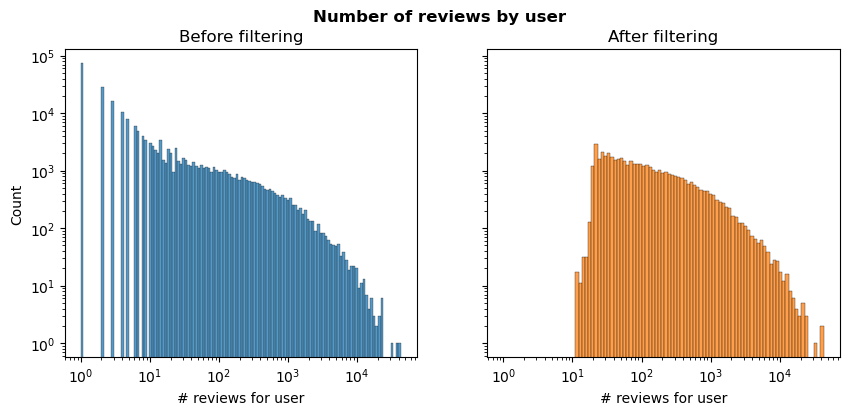

In [7]:
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(10,4))

users_counts = df_ratings.groupby('user_id').size().reset_index().rename(columns={0: 'reviews_by_user'})
sns.histplot(data = users_counts, x='reviews_by_user', log_scale=True, ax=ax[0], color='tab:blue')
ax[0].set_title('Before filtering')
ax[0].set_xlabel('# reviews for user')

users_counts_filt = df_ratings_filt_users.groupby('user_id').size().reset_index().rename(columns={0: 'reviews_by_user'})
sns.histplot(data = users_counts_filt, x='reviews_by_user', log_scale=True, ax=ax[1], color='tab:orange')
ax[1].set_title('After filtering')
ax[1].set_xlabel('# reviews for user')

fig.suptitle('Number of reviews by user', weight='bold')
plt.yscale('log')
plt.show()

In [8]:
print(f'There are {(df_breweries.total_nbr_beers == 0).sum()} breweries without reviews for beers')

df_breweries_filt = df_breweries[~(df_breweries['total_nbr_beers'] == 0)]

There are 1627 breweries without reviews for beers


In [9]:
# Filter to have only location with at least 30 breweries
brewery_per_location_counts = df_breweries_filt.groupby('country_brewery').size().reset_index().rename(columns={0:'brewery_per_location'})
brewery_per_location_counts_filt, df_ratings_filt_countries = pproc.filter_by_ratings(brewery_per_location_counts, df_ratings_filt_users, 30, 'brewery_per_location', 'country_brewery')

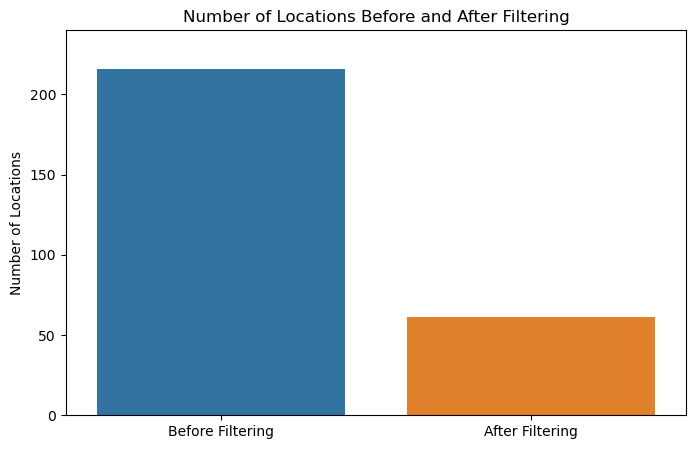

In [10]:
data_filt_countries = pd.DataFrame({
    'Status': ['Before Filtering', 'After Filtering'],
    'Count': [len(brewery_per_location_counts), len(brewery_per_location_counts_filt)]
})

# Create a point plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Status', y='Count', data=data_filt_countries, palette={'Before Filtering': 'tab:blue', 'After Filtering': 'tab:orange'})
plt.ylim([0,240])
plt.title('Number of Locations Before and After Filtering')
plt.xlabel('')
plt.ylabel('Number of Locations')
plt.show()

# Data analysis

In [11]:
## ADD part where you upload and work with the filtered dataframe

'''dpath = './Data/unified_breweries_filt.pkl'
with open(dpath, 'rb') as f:
    df_breweries_filt = pkl.load(f)

data_path = './Data/unified_users_filt.pkl'
with open(data_path, 'rb') as f:
    df_users_filt = pkl.load(f)

data_path = './Data/unified_ratings_filt.pkl'
with open(data_path, 'rb') as f:
    df_ratings_filt = pkl.load(f)'''

df_ratings_filt = df_ratings_filt_countries
df_users_filt = df_users

### Preffered beer styles by country

In [12]:
# Expertise
df_users['expertise'] = (df_users['total_nbr_ratings'] >= 3352).astype(int)

equivalent_expertise = dict(zip(df_users['user_id'], df_users['expertise']))
df_ratings_filt['expertise']=df_ratings_filt['user_id'].map(equivalent_expertise)
df_ratings_filt.head()

,beer_name,beer_id,brewery_name,brewery_id,style,date,rating,user_id,text,Procedence,...,country_brewery,year,Season,z_score,exp_mean,diff_exp_mean,ith_rating,detrend,macro_style,expertise
0,Abita Andygator,3.0,Abita Brewing Company,1.0,Maibock / Helles Bock,2003-10-15 10:00:00,3.55,11266.0,I had this one on tap while in New Orleans. I...,BA,...,United States,2003,Autumn,-0.201923,-0.201923,0.000000,1,-0.032678,Bock,0
1,Abita Andygator,3.0,Abita Brewing Company,1.0,Maibock / Helles Bock,2003-12-22 11:00:00,3.85,6816.0,Well carbonated greenish gold. The color is a...,BA,...,United States,2003,Winter,0.228929,0.013503,0.215426,2,0.397968,Bock,0
2,Abita Andygator,3.0,Abita Brewing Company,1.0,Maibock / Helles Bock,2004-04-06 10:00:00,2.90,5470.0,Everything about this beer seemed average or ...,BA,...,United States,2004,Spring,-1.253651,-0.408882,-0.844769,3,-1.084818,Bock,0
3,Abita Andygator,3.0,Abita Brewing Company,1.0,Maibock / Helles Bock,2004-04-22 10:00:00,2.39,5545.0,This can't be a dopplebock. The bar listed it...,BA,...,United States,2004,Spring,-2.019939,-0.811646,-1.208293,4,-1.851312,Bock,0
4,Abita Andygator,3.0,Abita Brewing Company,1.0,Maibock / Helles Bock,2004-05-02 10:00:00,3.28,32532.0,I had this on tap at the Abita Brew Pub in Ab...,BA,...,United States,2004,Spring,-0.682692,-0.785855,0.103163,5,-0.514270,Bock,0


In [29]:
def weighted_average(group):
    # Define weights based on 'expertise'
    weights = {1: 1.5, 0: 1}

    # Calculate the weighted average
    weighted_avg = (group['detrend'] * group['expertise'].map(weights)).sum() / group['expertise'].map(weights).sum()

    return pd.Series({'macro_style': group['macro_style'].iloc[0], 'country_brewery': group['country_brewery'].iloc[0], 'final_score': weighted_avg})

weighted_scores = df_ratings_filt.groupby(['country_brewery', 'macro_style'], as_index=False).apply(weighted_average)
weighted_scores = weighted_scores.sort_values(by=['country_brewery', 'final_score'],  ascending=[True, False])
desired_order = ['country_brewery', 'macro_style', 'final_score']
weighted_scores = weighted_scores[desired_order]
weighted_scores

,country_brewery,macro_style,final_score
13,Argentina,Smoked,-0.266899
2,Argentina,Bock,-0.300116
14,Argentina,Stout,-0.345592
8,Argentina,IPA,-0.467432
16,Argentina,Strong Brown/Dark Ale,-0.470246
...,...,...,...
1133,Wales,Wheat Beer,-0.296245
1130,Wales,Strong Ale,-0.323854
1125,Wales,Pale Ale,-0.358470
1119,Wales,Bock,-0.375377


In [33]:
gigi = pd.crosstab(weighted_scores['country_brewery'], weighted_scores['macro_style'], values=weighted_scores['final_score'], aggfunc='mean')
gigi

macro_style,Ale,Amber Ale,Bock,Brown/Dark Ale,Cocktails,Dark Lager,Herbs/Vegetables,Hybrid Beer,IPA,Low Alcohol,Pale Ale,Pilsner & Pale Lager,Porter,Smoked,Stout,Strong Ale,Strong Brown/Dark Ale,Strong Pale Ale,Wheat Beer,Wild/Sour Beer
country_brewery,,,,,,,,,,,,,,,,,,,,
Argentina,-0.749725,-0.915617,-0.300116,-0.683294,-2.273014,-0.774077,-0.900112,-0.944117,-0.467432,-2.645912,-0.853580,-1.955552,-0.568582,-0.266899,-0.345592,-0.631570,-0.470246,-0.596022,-0.858497,-0.657191
Australia,-0.227078,-0.330493,-0.046049,-0.284360,-1.070205,-0.320086,-0.669589,-0.580065,0.149342,-2.020448,-0.558433,-1.690852,-0.028254,-0.011624,0.125820,0.062755,0.408501,-0.007759,-0.626472,0.022519
Austria,-0.128614,-0.342642,0.042743,-0.280577,0.251225,-0.721886,-0.562477,-0.365769,0.162718,-2.172654,-0.125734,-0.979921,-0.037206,0.056737,0.097649,-0.030606,0.365782,-0.150043,-0.281544,-0.076780
Belarus,-1.676044,-0.494246,-1.180841,-0.778011,NaN,-1.002582,-1.503586,-1.264771,-0.194353,-1.735120,-0.393074,-1.872696,-0.736962,-1.616323,-0.283914,NaN,0.435449,NaN,-0.768916,-0.695496
Belgium,-0.095466,-0.347591,-0.312706,0.205762,-0.174295,-0.418066,-0.660245,0.161468,0.219899,-1.916519,0.072146,-1.377546,0.202760,-0.139086,0.387364,0.395673,0.627048,0.241457,-0.214066,0.465457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Thailand,-0.259910,-0.182931,-0.294931,-0.302581,-2.519699,-0.831981,-0.975507,-0.261459,-0.184866,NaN,-0.391067,-1.883727,-0.023339,0.168531,-0.019783,-0.128906,0.495813,0.327132,-0.555564,NaN
Ukraine,-0.971010,-0.515840,-0.805911,-0.564450,-2.546517,-0.925239,-0.911032,-0.565189,-0.189196,-1.987031,-0.558202,-1.739017,-0.315926,-0.231195,-0.084708,-0.524540,0.046869,-0.399282,-0.776195,-0.071598
United States,0.100471,-0.302644,-0.200694,-0.145361,-2.263234,-0.326915,-0.426955,-0.341894,0.200145,-2.501050,-0.131609,-1.064983,0.135465,0.018590,0.418189,0.297623,0.297606,-0.009941,-0.317677,0.378974


In [34]:
top_beers = pd.DataFrame(gigi.idxmax(axis = 1), columns=['top_1'])
top_beers = top_beers.reset_index()
top_beers = top_beers.rename(columns = {'index':'country_brewery'})
top_beers

,country_brewery,top_1
0,Argentina,Smoked
1,Australia,Strong Brown/Dark Ale
2,Austria,Strong Brown/Dark Ale
3,Belarus,Strong Brown/Dark Ale
4,Belgium,Strong Brown/Dark Ale
...,...,...
56,Thailand,Strong Brown/Dark Ale
57,Ukraine,Strong Brown/Dark Ale
58,United States,Stout
59,Vietnam,Wild/Sour Beer


In [55]:
iso_alpha = pd.read_csv('iso_alpha_countries.csv')
iso_alpha = iso_alpha[['name', 'alpha-3']]
iso_alpha = iso_alpha.rename(columns = {'name':'country_brewery', 'alpha-3':'iso_alpha'})

merged = top_beers.merge(iso_alpha, on='country_brewery')
merged

,country_brewery,top_1,iso_alpha
0,Argentina,Smoked,ARG
1,Australia,Strong Brown/Dark Ale,AUS
2,Austria,Strong Brown/Dark Ale,AUT
3,Belarus,Strong Brown/Dark Ale,BLR
4,Belgium,Strong Brown/Dark Ale,BEL
5,Brazil,Strong Ale,BRA
6,Bulgaria,Strong Ale,BGR
7,Canada,Strong Pale Ale,CAN
8,Chile,Smoked,CHL
9,China,Strong Brown/Dark Ale,CHN


In [56]:
missing_iso = pd.read_csv('missing_iso_alpha.csv', sep=';')
merged =pd.concat([merged, missing_iso])
merged.dropna()

,country_brewery,top_1,iso_alpha
0,Argentina,Smoked,ARG
1,Australia,Strong Brown/Dark Ale,AUS
2,Austria,Strong Brown/Dark Ale,AUT
3,Belarus,Strong Brown/Dark Ale,BLR
4,Belgium,Strong Brown/Dark Ale,BEL
...,...,...,...
32,Taiwan,Pilsner & Pale Lager,TWN
33,Tanzania,Pilsner & Pale Lager,TZA
35,Vatican City,Pale Ale,VAT
36,Venezuela,Pilsner & Pale Lager,VEN


In [62]:
df = px.data.gapminder().query("year==2007")

fig = px.choropleth(merged, locations="iso_alpha", 
                    color="top_1", # lifeExp is a column of gapminder
                    hover_name="country_brewery", # column to add to hover information
                    color_continuous_scale= palette_styles) #Color
fig.show()

### Trimesteric beer style preference by country


### Locality VS industriality by country
Bi-directional plot

### Text analysis associated to the beer styles
wordclouds

### Prediction of country
Tree